In [15]:
# 我们使用鸢尾花数据集，进行分析考核可视化
# 引入数据
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
# 从头开始取，取列表的第二和第三
X = iris.data[:,[2,3]]
y = iris.target
# 去重复值，即找到分类
print("Class labels:",np.unique(y))  #打印分类类别的种类

Class labels: [0 1 2]


In [16]:
# 切分训练数据和测试数据
from sklearn.model_selection import train_test_split
## 30%测试数据，70%训练数据，stratify=y表示训练数据和测试数据具有相同的类别比例
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [17]:
#数据标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## 估算训练数据中的mu和sigma
sc.fit(X_train)
## 使用训练数据中的mu和sigma对数据进行标准化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
#数据归一化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## 估算训练数据中的mu和sigma
sc.fit(X_train)
## 使用训练数据中的mu和sigma对数据进行标准化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
# 定制可视化函数：画出决策边界图(只有在2个特征才能画出来)

## 画出决策边界图(只有在2个特征才能画出来)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy')
classifier=classifier.fit(X_train,y_train)

def plot_decision_region(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])


    # plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    # resolution是步长
    # 返回的是X轴和y轴的坐标矩阵
    # 二维坐标系中,X轴可以取三个值1,2,3, Y轴可以取三个值7,8, 请问可以获得多少个点的坐标?
    # 显而易见是6个:
    # (1,7)(2,7)(3,7)
    # (1,8)(2,8)(3,8)
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())


    # plot class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y = X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker = markers[idx],
                    label=cl,
                    edgecolors='black')

C:\Users\king\AppData\Local\Temp\ipykernel_1984\2163070761.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


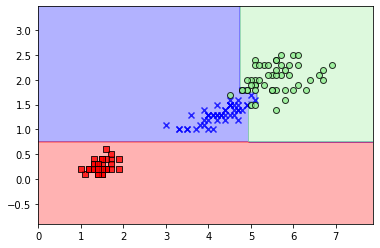

In [20]:
plot_decision_region(X,y,classifier,resolution=0.02)